In [64]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import plotly.express as px
from wordcloud import WordCloud

In [51]:
df = pd.read_csv('stock_data.csv')
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


# EDA

In [53]:
df.describe()

,Sentiment
count,5791.000000
mean,0.272664
std,0.962192
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [59]:
f1 = px.histogram(df,x='Sentiment',color='Sentiment',title='sentiment count')
f1.show()

In [61]:
positive = df[df['Sentiment'] == 1 ]
negative = df[df['Sentiment'] == -1]

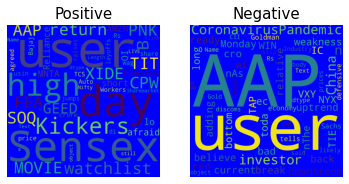

In [71]:
plt.subplot(1, 2, 1)
f2 = WordCloud(background_color = 'blue',width = 1500, height = 1500).generate(str(positive['Text']))
plt.title('Positive', fontsize = 15)
plt.imshow(f2)
plt.axis('off')

plt.subplot(1, 2, 2)
f2 = WordCloud(background_color = 'blue',width = 1500, height = 1500).generate(str(negative['Text']))
plt.title('Negative', fontsize = 15)
plt.imshow(f2)
plt.axis('off')
plt.show()

# NLP

In [34]:
x = df.Text
y = df.Sentiment

In [35]:
lemma = WordNetLemmatizer()
corpus = []

In [37]:
for i in range(len(x)):
    review = re.sub('[^a-zA-Z]', " ", x[i])
    review = review.lower()
    review = review.split()
    review = [lemma.lemmatize(word)for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_new = cv.fit_transform(corpus).toarray()
y_new = np.array(y)

# Model

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3)

In [114]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=10,learning_rate=0.8)

In [115]:
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [116]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

          -1       0.64      0.65      0.65       651
           1       0.79      0.78      0.78      1087

    accuracy                           0.73      1738
   macro avg       0.71      0.72      0.71      1738
weighted avg       0.73      0.73      0.73      1738



In [117]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [118]:
cr2 = classification_report(y_test, y_pred)
print(cr2)

              precision    recall  f1-score   support

          -1       0.71      0.60      0.65       651
           1       0.78      0.86      0.82      1087

    accuracy                           0.76      1738
   macro avg       0.75      0.73      0.74      1738
weighted avg       0.76      0.76      0.76      1738



In [107]:
y_train_new=y_train.copy()
y_train_new[y_train_new == -1] = 0

xgb.fit(X_train, y_train_new)
y_pred = xgb.predict(X_test)

In [108]:
y_test_new=y_test.copy()
y_test_new[y_test_new == -1] = 0
cr3 = classification_report(y_test_new, y_pred)
print(cr3)

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       651
           1       0.80      0.85      0.82      1087

    accuracy                           0.77      1738
   macro avg       0.76      0.75      0.75      1738
weighted avg       0.77      0.77      0.77      1738



In [122]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

In [123]:
cr4 = classification_report(y_test, y_pred)
print(cr4)

              precision    recall  f1-score   support

          -1       0.70      0.57      0.63       651
           1       0.77      0.85      0.81      1087

    accuracy                           0.75      1738
   macro avg       0.73      0.71      0.72      1738
weighted avg       0.74      0.75      0.74      1738

